In [10]:
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np

In [2]:
import os
import sys

# ĐƯỜNG DẪN TUYỆT ĐỐI (CỨU TINH CỦA BẠN)
HARD_CODED_ROOT = r"C:\Users\VICTUS\Documents\developer\self-learning\cv-agricultural-land-classification"
SRC_PATH = os.path.join(HARD_CODED_ROOT, 'src') # <--- Thêm cái này

print(f"🔧 Cấu hình môi trường...")

# 1. Ép Working Directory về Root (Để load data/config đúng)
try:
    os.chdir(HARD_CODED_ROOT)
    print(f"✅ Working Directory: {os.getcwd()}")
except FileNotFoundError:
    print("❌ Sai đường dẫn Root!")

# 2. Ép cả Root và Src vào sys.path (Để import code đúng)
# Add Root để gọi được 'from src...'
if HARD_CODED_ROOT not in sys.path:
    sys.path.insert(0, HARD_CODED_ROOT)

# Add Src để bên trong data_module gọi 'import utils' được
if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH) # <--- QUAN TRỌNG: Nhét src vào họng nó

print("✅ Đã update sys.path bao gồm cả folder src")

# --- IMPORT ---
print("-" * 20)
try:
    # Reload lại module để chắc chắn nó nhận path mới
    import importlib
    import src.data_module
    importlib.reload(src.data_module)
    
    from src.data_module import GeoDataset
    from src.utils import load_config
    print("🚀 IMPORT THÀNH CÔNG! (Lần này chắc chắn)")
except ImportError as e:
    print(f"❌ Vẫn lỗi: {e}")

🔧 Cấu hình môi trường...
✅ Working Directory: C:\Users\VICTUS\Documents\developer\self-learning\cv-agricultural-land-classification
✅ Đã update sys.path bao gồm cả folder src
--------------------
🚀 IMPORT THÀNH CÔNG! (Lần này chắc chắn)


In [3]:
data_config_info = load_config(
    r'config/data_config.yml'
)
raw_dataset = GeoDataset(
    data_config=data_config_info
)

In [4]:
import pandas as pd

In [5]:
print(f"Số cột trong dataset: {list(raw_dataset.dataset.keys())}")
num_samples = len(raw_dataset.dataset['image'])
print(f"✅ Số mẫu thực tế (số ảnh): {num_samples}")

Số cột trong dataset: ['image', 'path', 'class', 'label_idx']
✅ Số mẫu thực tế (số ảnh): 6000


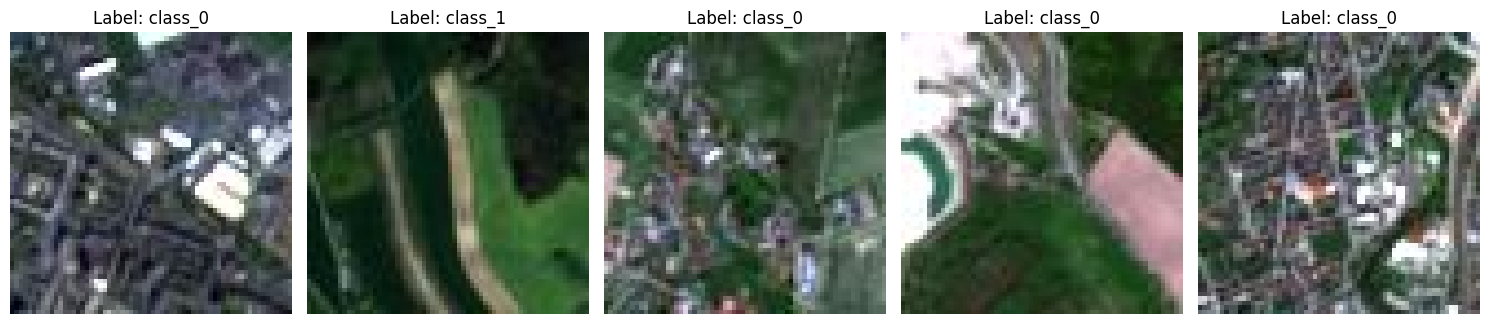

In [11]:
images = raw_dataset.dataset['image']
labels = raw_dataset.dataset['class']
paths = raw_dataset.dataset['path']

# Chọn ngẫu nhiên 5 chỉ số
random_indices = random.sample(range(num_samples), 5)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    img = images[idx] 

    plt.imshow(img)
    plt.title(f"Label: {labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
import seaborn as sns

# 1. Chuyển thành DataFrame cho dễ xử lý (nếu chưa làm)
columns = raw_dataset.dataset.keys()
for column in columns:
    print(f"- Cột: {column}, Số mẫu: {len(raw_dataset.dataset[column])}")




- Cột: image, Số mẫu: 6000
- Cột: path, Số mẫu: 6000
- Cột: class, Số mẫu: 6000
- Cột: label_idx, Số mẫu: 6000


In [14]:
def show_raw_image(raw_list_data):
    """
    Hàm visualize ảnh từ dữ liệu raw list [[r,g,b], ...]
    """
    # 1. QUAN TRỌNG: Chuyển list thành numpy array kiểu uint8 (0-255)
    # Nếu không có dòng này, ảnh có thể bị trắng xóa hoặc sai màu
    img_array = np.array(raw_list_data, dtype=np.uint8)
    
    # 2. Vẽ ảnh
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array)
    
    # Trang trí thêm thông tin
    plt.axis('off') # Tắt cái khung tọa độ đi cho đẹp
    plt.title(f"Shape: {img_array.shape}") # Hiện kích thước ảnh (H, W, 3)
    plt.show()

<class 'numpy.ndarray'>


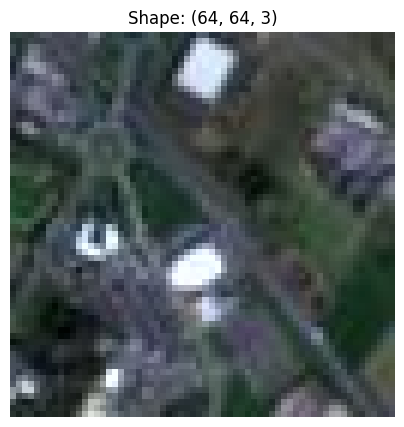

In [17]:
print(type(raw_dataset.dataset['image'][0]))
show_raw_image(raw_dataset.dataset['image'][0])